In [1]:
#ignore warnings
import warnings
warnings.simplefilter("ignore")

#Importing librabries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


%matplotlib inline 

In [2]:
#Load the data set
saledt = pd.read_csv("C:/Users/MACHIRA/ADS-Assignment-10-main/KAG_conversion_data.csv")
saledt.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
#data info
saledt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
#checking the number of rows and columns
saledt.shape

(1143, 11)

In [5]:
saledt.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [6]:
#Spliting categorical data and numerical data

#categorical_data = saledt.select_dtypes(include=['object'])
categorical_ft = ['age', 'gender']
numerical_ft = ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion']

In [7]:
#Statistical overviews on numerical data
saledt[numerical_ft].describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
#dummy encoding
#X = pd.get_dummies(data=categorical_data)
for col in categorical_ft:
    dummies = pd.get_dummies(saledt[col], prefix=col)#dummy encoding
    X = pd.concat([saledt, dummies], axis=1)#let's combine our intial data with the dummies
    X.drop(col, axis=1, inplace=True)
X = X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age'], axis=1) #let's drop the first 4 columns
X.head()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,15,7350,1,1.43,2,1,0,1
1,16,17861,2,1.82,2,0,0,1
2,20,693,0,0.00,1,0,0,1
3,28,4259,1,1.25,1,0,0,1
4,28,4133,1,1.29,1,1,0,1


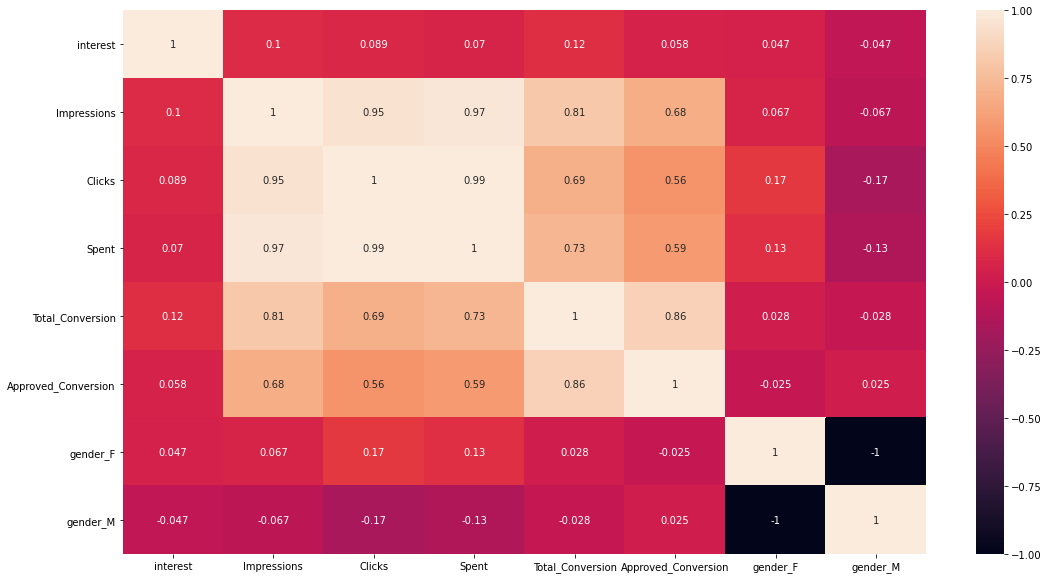

In [9]:
#Let's find the correlation of the data X
corr = X.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
#let's scale the data
stanscal = StandardScaler()
stanscal.fit(X)
X_transformed = stanscal.transform(X)

In [11]:
#Let's run K means for arange of clusters using the for loop and collect distorns into a list
dist=[]#it's an empty array of sum of squared distances
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++')#defining the Kmeans function with initialization as k-means++
    kmeanModel.fit(X_transformed)
    dist.append(kmeanModel.inertia_)#appending the results to the empty array
dist

[5802.942548201495,
 3769.294531640985,
 3010.8449066093,
 2540.888245212501,
 2255.3848192275323,
 2002.956441053995,
 1748.5824031544519,
 1559.3713704494044,
 1398.4725763335014,
 1314.6664750256202,
 1243.5554148847323,
 1172.9729045963227,
 1106.0838688843453,
 1058.5623973253084,
 1010.5092642758616,
 954.1209835831999,
 915.7089530510166,
 867.2788840402735]

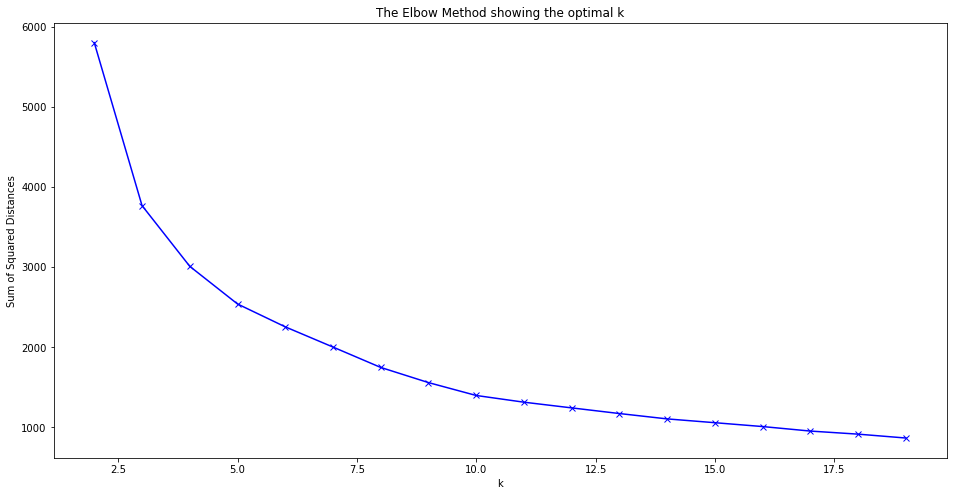

In [12]:
#Let's plot the visualization
plt.figure(figsize=(16,8))
plt.plot(K, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
#from the above graph we'll use 10 clusters
km = KMeans(n_clusters=10, init='k-means++')
km.fit(X_transformed)
y_means = km.predict(X_transformed)
print(y_means)

[6 6 6 ... 8 5 5]


In [14]:
#converting the array into a pandas dataframe
y_means = pd.DataFrame(y_means)
y_means['Advert_Type']=y_means#Nameing the column as Advert_Type

In [15]:
#merging our predictions with the original dat
saledt = pd.merge(saledt, y_means['Advert_Type'], how='right', right_index=True, left_index=True)
saledt.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,6
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,6
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,6
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,6
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,6


<AxesSubplot:xlabel='age', ylabel='Spent'>

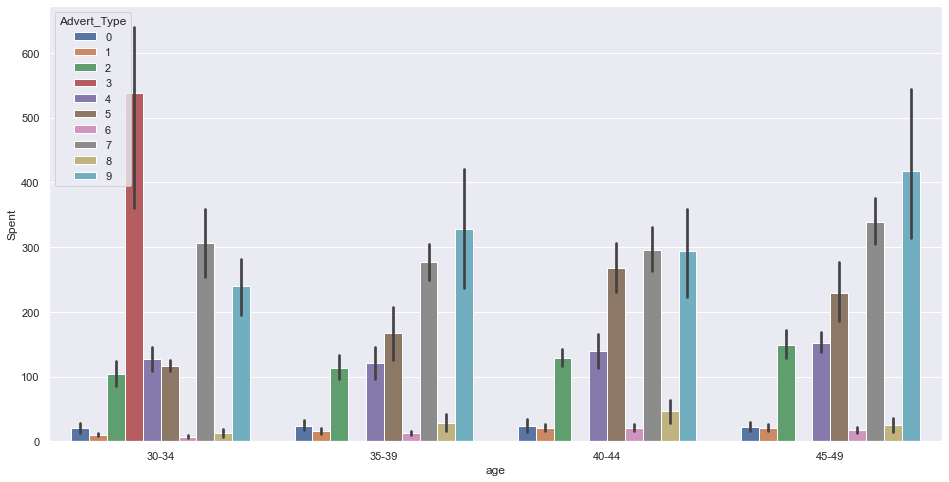

In [18]:
#Let's compare which advert type lead to the highest in amount of sales by customers of all the age brackets
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x='age', y='Spent', data=saledt, hue= 'Advert_Type')

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Spent'>

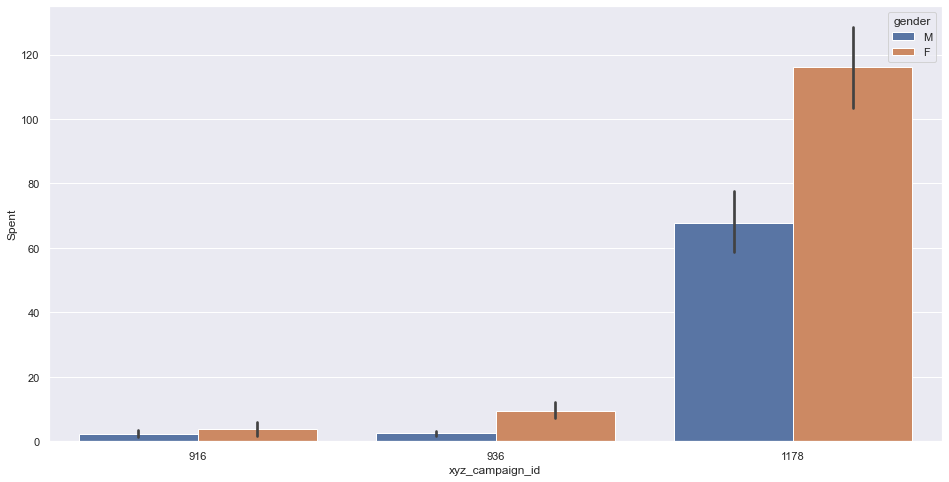

In [21]:
#Let's compare which gender has ad spendings in xyz campaigns 
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x='xyz_campaign_id', y='Spent', data=saledt, hue= 'gender')